In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline
df= pd.read_csv('../../data/01_raw_data/d-line/dline.csv')
colnames = list(df.columns[1:-1])
df.head()

,Unnamed: 0,Player,G,GS,Int,Yds,IntTD,Lng,PD,FF,...,Yds.1,FRTD,Sk,Comb,Solo,Ast,TFL,QBHits,Sfty,Awards
0,0,a'shawn robinson,17.00,13.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.000,62.0,34.0,28.0,6.0,1.00,0.0,0.0
1,1,aaron donald,13.50,13.5,0.0,0.0,0.0,0.0,2.5,0.5,...,0.0,0.0,6.500,51.0,27.5,23.5,13.0,17.00,0.0,7.5
2,2,abdullah anderson,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.250,5.0,3.0,2.0,0.5,0.50,0.0,0.0
3,3,adam butler,17.00,0.5,0.0,0.0,0.0,0.0,3.5,0.5,...,0.0,0.0,3.500,22.5,12.5,10.0,5.0,7.00,0.0,0.0
4,4,adam gotsis,13.25,3.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,1.375,20.0,13.0,7.0,3.0,6.25,0.0,0.0


In [84]:
df = df.drop(['Unnamed: 0', 'G', 'GS'], axis=1)
df

,Player,Int,Yds,IntTD,Lng,PD,FF,Fmb,FR,Yds.1,FRTD,Sk,Comb,Solo,Ast,TFL,QBHits,Sfty,Awards
0,a'shawn robinson,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.0,0.000,62.0,34.0,28.0,6.0,1.00,0.0,0.0
1,aaron donald,0.0,0.0,0.0,0.0,2.5,0.5,0.0,0.50,0.0,0.0,6.500,51.0,27.5,23.5,13.0,17.00,0.0,7.5
2,abdullah anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.250,5.0,3.0,2.0,0.5,0.50,0.0,0.0
3,adam butler,0.0,0.0,0.0,0.0,3.5,0.5,0.0,0.00,0.0,0.0,3.500,22.5,12.5,10.0,5.0,7.00,0.0,0.0
4,adam gotsis,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.25,0.0,0.0,1.375,20.0,13.0,7.0,3.0,6.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,zach harrison,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.00,0.0,0.0,2.000,29.5,12.0,17.5,3.5,3.00,0.5,0.0
483,zach kerr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,6.0,2.0,4.0,0.0,0.00,0.0,0.0
484,zach sieler,1.0,5.0,1.0,5.0,4.0,1.0,0.0,2.00,3.0,0.0,10.000,63.0,32.0,31.0,11.0,22.00,0.0,0.0
485,zachary carter,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.00,0.0,0.0,0.750,22.5,9.0,13.5,0.5,2.00,0.0,0.0


In [85]:
print(df['Player'].map(repr).value_counts().head(20))

Player
"a'shawn robinson"     1
'larry ogunjobi'       1
'matt henningsen'      1
'matt dickerson'       1
'marvin wilson'        1
'marshawn kneeland'    1
'marquiss spencer'     1
'marquise copeland'    1
'marquan mccall'       1
'marlon tuipulotu'     1
'marlon davidson'      1
'mario edwards'        1
'mario addison'        1
'margus hunt'          1
'marcus davenport'     1
'manny jones'          1
'malik herring'        1
'maliek collins'       1
'malcolm roach'        1
'malcolm koonce'       1
Name: count, dtype: int64


In [86]:
import unicodedata as ud
def clean_name(s):
    s = '' if pd.isna(s) else str(s)
    s = ud.normalize('NFKC', s)      # normalize Unicode (e.g., non‑breaking spaces)
    s = s.strip()                     # trim edges
    s = re.sub(r'\s+', ' ', s)       # collapse internal whitespace
    s = s.casefold()                  # case-insensitive
    return s
import re
df['Player'] = df['Player'].apply(clean_name)
df

,Player,Int,Yds,IntTD,Lng,PD,FF,Fmb,FR,Yds.1,FRTD,Sk,Comb,Solo,Ast,TFL,QBHits,Sfty,Awards
0,a'shawn robinson,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.0,0.000,62.0,34.0,28.0,6.0,1.00,0.0,0.0
1,aaron donald,0.0,0.0,0.0,0.0,2.5,0.5,0.0,0.50,0.0,0.0,6.500,51.0,27.5,23.5,13.0,17.00,0.0,7.5
2,abdullah anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.250,5.0,3.0,2.0,0.5,0.50,0.0,0.0
3,adam butler,0.0,0.0,0.0,0.0,3.5,0.5,0.0,0.00,0.0,0.0,3.500,22.5,12.5,10.0,5.0,7.00,0.0,0.0
4,adam gotsis,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.25,0.0,0.0,1.375,20.0,13.0,7.0,3.0,6.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,zach harrison,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.00,0.0,0.0,2.000,29.5,12.0,17.5,3.5,3.00,0.5,0.0
483,zach kerr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,6.0,2.0,4.0,0.0,0.00,0.0,0.0
484,zach sieler,1.0,5.0,1.0,5.0,4.0,1.0,0.0,2.00,3.0,0.0,10.000,63.0,32.0,31.0,11.0,22.00,0.0,0.0
485,zachary carter,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.00,0.0,0.0,0.750,22.5,9.0,13.5,0.5,2.00,0.0,0.0


In [93]:
features = ["Comb", "Solo", "Ast", "TFL", "Sk", "Int", "FF", "FR", "PD","QBHits", "Awards"]
X = df[features]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df["Cluster_Label"] = df["Cluster"].map(
    {0: "Elite", 1: "Bad", 2: "Good"}
)  # Based on center analysis

print(df[["Player", "Cluster"]])
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features))

                Player  Cluster
0     a'shawn robinson        2
1         aaron donald        0
2    abdullah anderson        1
3          adam butler        2
4          adam gotsis        1
..                 ...      ...
482      zach harrison        2
483          zach kerr        1
484        zach sieler        0
485     zachary carter        1
486         zion logue        1

[487 rows x 2 columns]

Cluster Centers:
        Comb       Solo        Ast        TFL        Sk       Int        FF  \
0  53.543860  32.947368  20.596491  12.473684  9.418860  0.201754  1.482456   
1  10.370206   5.245329   5.124877   0.987463  0.528024  0.010324  0.090954   
2  31.727390  17.282300  14.445090   4.582687  3.082364  0.062016  0.580103   

         FR        PD     QBHits        Awards  
0  0.504386  3.008772  21.921053  5.815789e+00  
1  0.090954  0.283432   1.492380 -4.996004e-16  
2  0.388889  1.428941   7.707364  1.608527e-01  


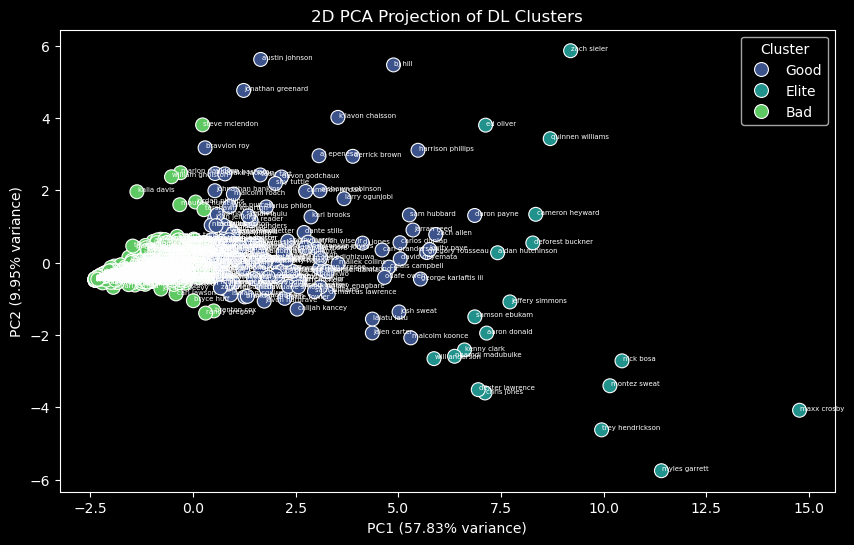

In [94]:
# PCA reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add to DF
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="PC1", y="PC2", hue="Cluster_Label", palette="viridis", s=100
)
for i, row in df.iterrows():
    plt.text(row["PC1"] + 0.02, row["PC2"], row["Player"], fontsize=5)  # Label players
plt.title("2D PCA Projection of DL Clusters")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(title="Cluster")
plt.show()

In [95]:
elite = df[df['Cluster'] == 1]
good = df[df['Cluster'] == 2]
bad = df[df['Cluster'] == 0]
elite

,Player,Int,Yds,IntTD,Lng,PD,FF,Fmb,FR,Yds.1,...,Solo,Ast,TFL,QBHits,Sfty,Awards,Cluster,Cluster_Label,PC1,PC2
2,abdullah anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,...,3.0,2.0,0.5,0.50,0.0,0.0,1,Bad,-1.760478,-0.077109
4,adam gotsis,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.25,0.0,...,13.0,7.0,3.0,6.25,0.0,0.0,1,Bad,0.379490,0.185764
5,adetomiwa adebawore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,4.5,1.5,2.0,3.00,0.0,0.0,1,Bad,-1.412365,-0.617871
6,adrian phillips,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,10.0,7.0,0.0,0.00,0.0,0.0,1,Bad,-1.282734,0.132927
9,akeem spence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2.0,3.5,0.0,0.00,0.0,0.0,1,Bad,-2.070448,-0.257603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,xavier williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,1.0,0.0,0.00,0.0,0.0,1,Bad,-2.381247,-0.447335
480,zacch pickens,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.00,0.0,...,8.5,11.0,1.0,2.00,0.0,0.0,1,Bad,-0.382946,0.033941
483,zach kerr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2.0,4.0,0.0,0.00,0.0,0.0,1,Bad,-2.035410,-0.229264
485,zachary carter,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.00,0.0,...,9.0,13.5,0.5,2.00,0.0,0.0,1,Bad,-0.111107,0.311292


In [96]:
good

,Player,Int,Yds,IntTD,Lng,PD,FF,Fmb,FR,Yds.1,...,Solo,Ast,TFL,QBHits,Sfty,Awards,Cluster,Cluster_Label,PC1,PC2
0,a'shawn robinson,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,...,34.0,28.000000,6.000000,1.000000,0.0,0.0,2,Good,3.091776,1.989213
3,adam butler,0.000000,0.000000,0.000000,0.000000,3.500000,0.500000,0.0,0.000000,0.0,...,12.5,10.000000,5.000000,7.000000,0.0,0.0,2,Good,1.783391,0.072041
8,aj epenesa,0.666667,12.666667,0.333333,10.666667,4.666667,1.000000,0.0,0.666667,0.0,...,10.0,6.666667,5.333333,9.666667,0.0,0.0,2,Good,3.070647,2.957247
10,akiem hicks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,19.0,6.000000,5.000000,9.000000,0.0,0.0,2,Good,0.985709,-0.559051
15,alex okafor,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0,0.000000,0.0,...,7.0,16.000000,0.000000,7.000000,0.0,0.0,2,Good,0.791282,0.186059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,yannick ngakoue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,13.0,9.000000,6.000000,7.000000,0.0,0.0,2,Good,0.852631,-0.559243
478,yetur gross-matos,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.0,...,17.0,10.666667,6.000000,7.000000,0.0,0.0,2,Good,1.477106,-0.440807
479,za'darius smith,0.000000,0.000000,0.000000,0.000000,1.500000,0.500000,0.0,0.000000,0.0,...,9.5,4.500000,4.000000,10.000000,0.0,0.0,2,Good,0.668564,-0.697454
481,zach allen,0.000000,0.000000,0.000000,0.000000,4.500000,0.500000,0.0,0.000000,0.0,...,25.0,28.500000,9.000000,22.000000,0.0,0.0,2,Good,5.911790,0.778410


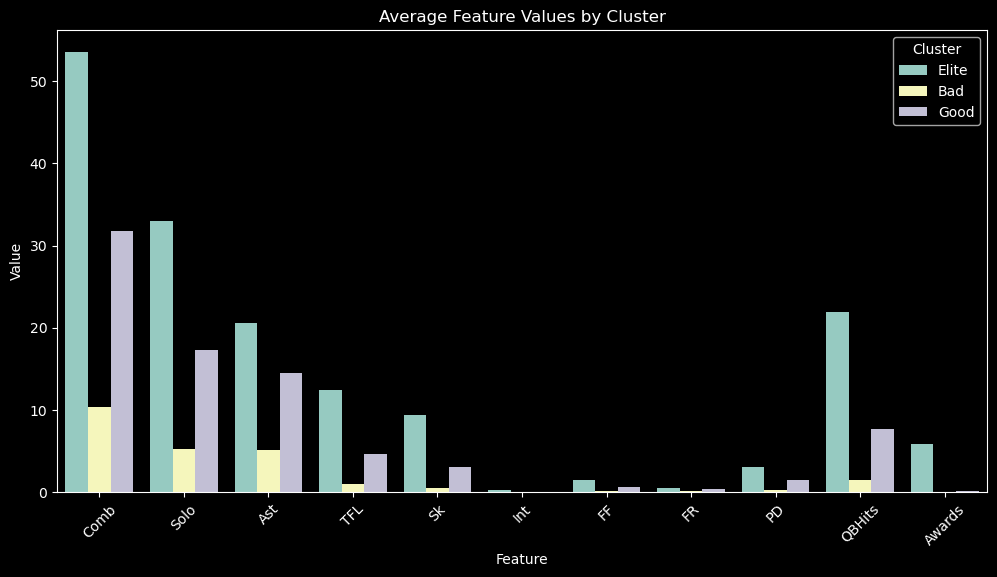

In [98]:
# Get centers (unscaled)
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), columns=features
)
centers["Cluster"] = ["Elite", "Bad", "Good"]  # Adjust based on your labels

# Melt for plotting
centers_melt = centers.melt(id_vars="Cluster", var_name="Feature", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=centers_melt, x="Feature", y="Value", hue="Cluster")
plt.title("Average Feature Values by Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

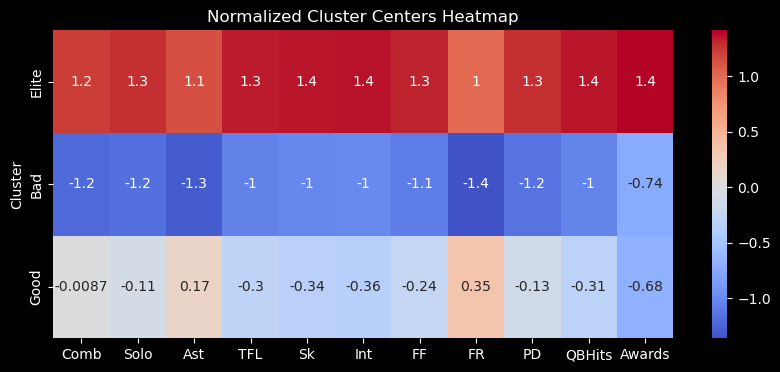

In [99]:
# Normalize centers for heatmap
centers_norm = pd.DataFrame(
    StandardScaler().fit_transform(centers.drop("Cluster", axis=1)),
    columns=features,
    index=centers["Cluster"],
)

# Plot
plt.figure(figsize=(10, 4))
sns.heatmap(centers_norm, annot=True, cmap="coolwarm", center=0)
plt.title("Normalized Cluster Centers Heatmap")
plt.show()